# <img style="float: left; padding-right: 10px; width: 45px" src="iacs.png"> S-109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

Names of people you have worked with goes here: 



<hr style="height:2pt">

In [3]:
from IPython.display import HTML

from IPython.core.display import HTML
def css_styling(): styles = open("cs109.css", "r").read(); return HTML(styles)
css_styling()


In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<div class="theme"> Main Theme: Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1  [20 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with clear labels on the x and y axes. The time of the day on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1**

In [5]:
## Code here

data = pd.read_csv('dataset_1.csv')
# Random_state makes sure same split each time this random process is run (takes out randomness)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_data.head()

,TimeMin,PickupCount
1194,404.0,5.0
911,131.0,17.0
422,85.0,13.0
670,539.0,36.0
931,1266.0,46.0


In [6]:
train_data.describe()

,TimeMin,PickupCount
count,1000.000000,1000.00000
mean,703.033000,33.15600
std,405.105068,19.17575
min,4.000000,1.00000
25%,366.000000,17.00000
50%,682.500000,32.00000
75%,1046.250000,46.00000
max,1438.000000,116.00000


In [7]:
# Test size is indeed 20% of total
print(test_data.shape)
test_data.describe()


(250, 2)


,TimeMin,PickupCount
count,250.000000,250.000000
mean,700.208000,33.528000
std,407.833246,19.013449
min,7.000000,1.000000
25%,340.000000,17.250000
50%,721.000000,34.000000
75%,1047.000000,44.000000
max,1438.000000,101.000000


**1.2**

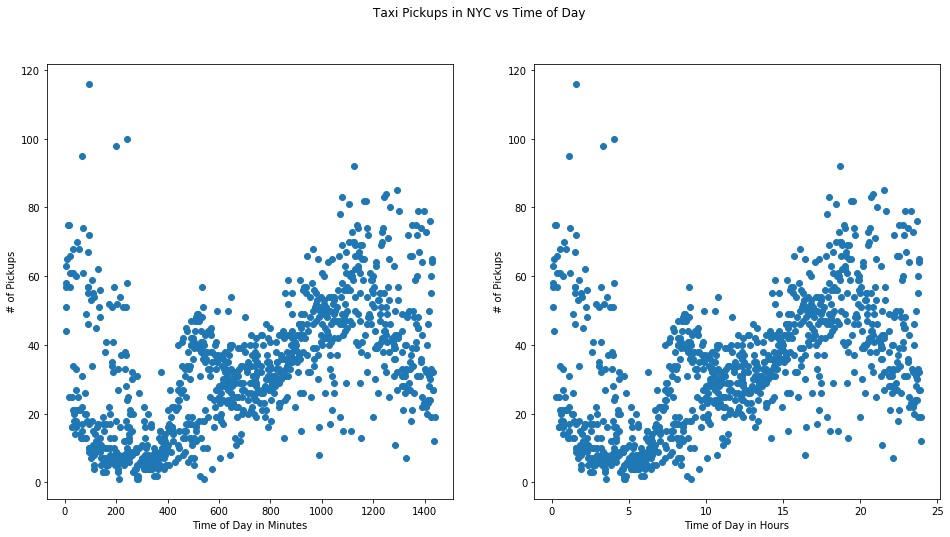

In [6]:
## Code for your plot here
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes[0].scatter(train_data['TimeMin'], train_data['PickupCount'])
axes[0].set_xlabel('Time of Day in Minutes')
axes[0].set_ylabel('# of Pickups')

# Hours might be a more readable format of displaying the x-axis; apply a scale transformation
axes[1].scatter(train_data['TimeMin']/60, train_data['PickupCount']);
axes[1].set_xlabel('Time of Day in Hours');
axes[1].set_ylabel('# of Pickups');

fig.suptitle("Taxi Pickups in NYC vs Time of Day");



**1.3**

**Discuss your results. Does the pattern of taxi pickups make intuitive sense to you?**

The pattern of pickups seems to bear out the social patterns you'd expect in a major urban metropolis like New York.  We see instances of very high pickup counts between midnight and 5 a.m. when people take cabs home as bars close (in a city that never sleeps as opposed to a quiet academic town like Boston).  Then you see a linear trend of pickups starting at a low point in the early morning (just after 5 a.m.) during the beginning of the morning commute when you'd expect very little social going on and steadily increasing to the common social hours in the evening at night when you'd expect people to congregate for dinner, shows, concerts, etc. There does appear to be a mid-morning surge around 8am to 10:30am, perhaps as some people travel to work via taxi.  


<div class="exercise"> <b>Question 2 [20 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of **predictions** for `PickupCount` vs  `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. Each subplot should use different color and/or markers to distinguish k-NN regression prediction values from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).

**2.4**. Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1**

In [7]:
## Code here

# define k values
k_values = [1, 10, 75, 250, 500, 750, 1000]

# build a dictionary KNN models
KNNModels = {k: KNeighborsRegressor(n_neighbors=k) for k in k_values}

# fit each KNN model
for k_value in KNNModels: 
    KNNModels[k_value].fit(train_data[['TimeMin']], train_data[['PickupCount']])


**2.2**

In [8]:
## Code for your plot here

# Generate predictions
knn_predicted_pickups_train = {k: KNNModels[k].predict(train_data[['TimeMin']]) for k in KNNModels}
knn_predicted_pickups_test = {k: KNNModels[k].predict(test_data[['TimeMin']]) for k in KNNModels}


In [9]:
# Preferred to use a function if the process is identical and repeated with varying inputs
# Try to use functions in your homeworks to make things easier for yourself and more replicable

# Function to plot predicted vs actual for a given k and dataset
def plot_knn_prediction(ax, dataset, predictions, k, dataset_name= "Training"):
    
    # scatter plot predictions
    ax.plot(dataset['TimeMin'], predictions, '*',  label='Predicted')
    
    # scatter plot actual
    ax.plot(dataset['TimeMin'], dataset['PickupCount'], '.', alpha=0.2, label='Actual')
    
    
    # Set labels
    ax.set_title("Predictions vs Actual for $k = {}$ on {} Set".format(str(k), dataset_name))
    ax.set_xlabel('Normalized Time')
    ax.set_ylabel('Pickup Count')
    ax.legend()

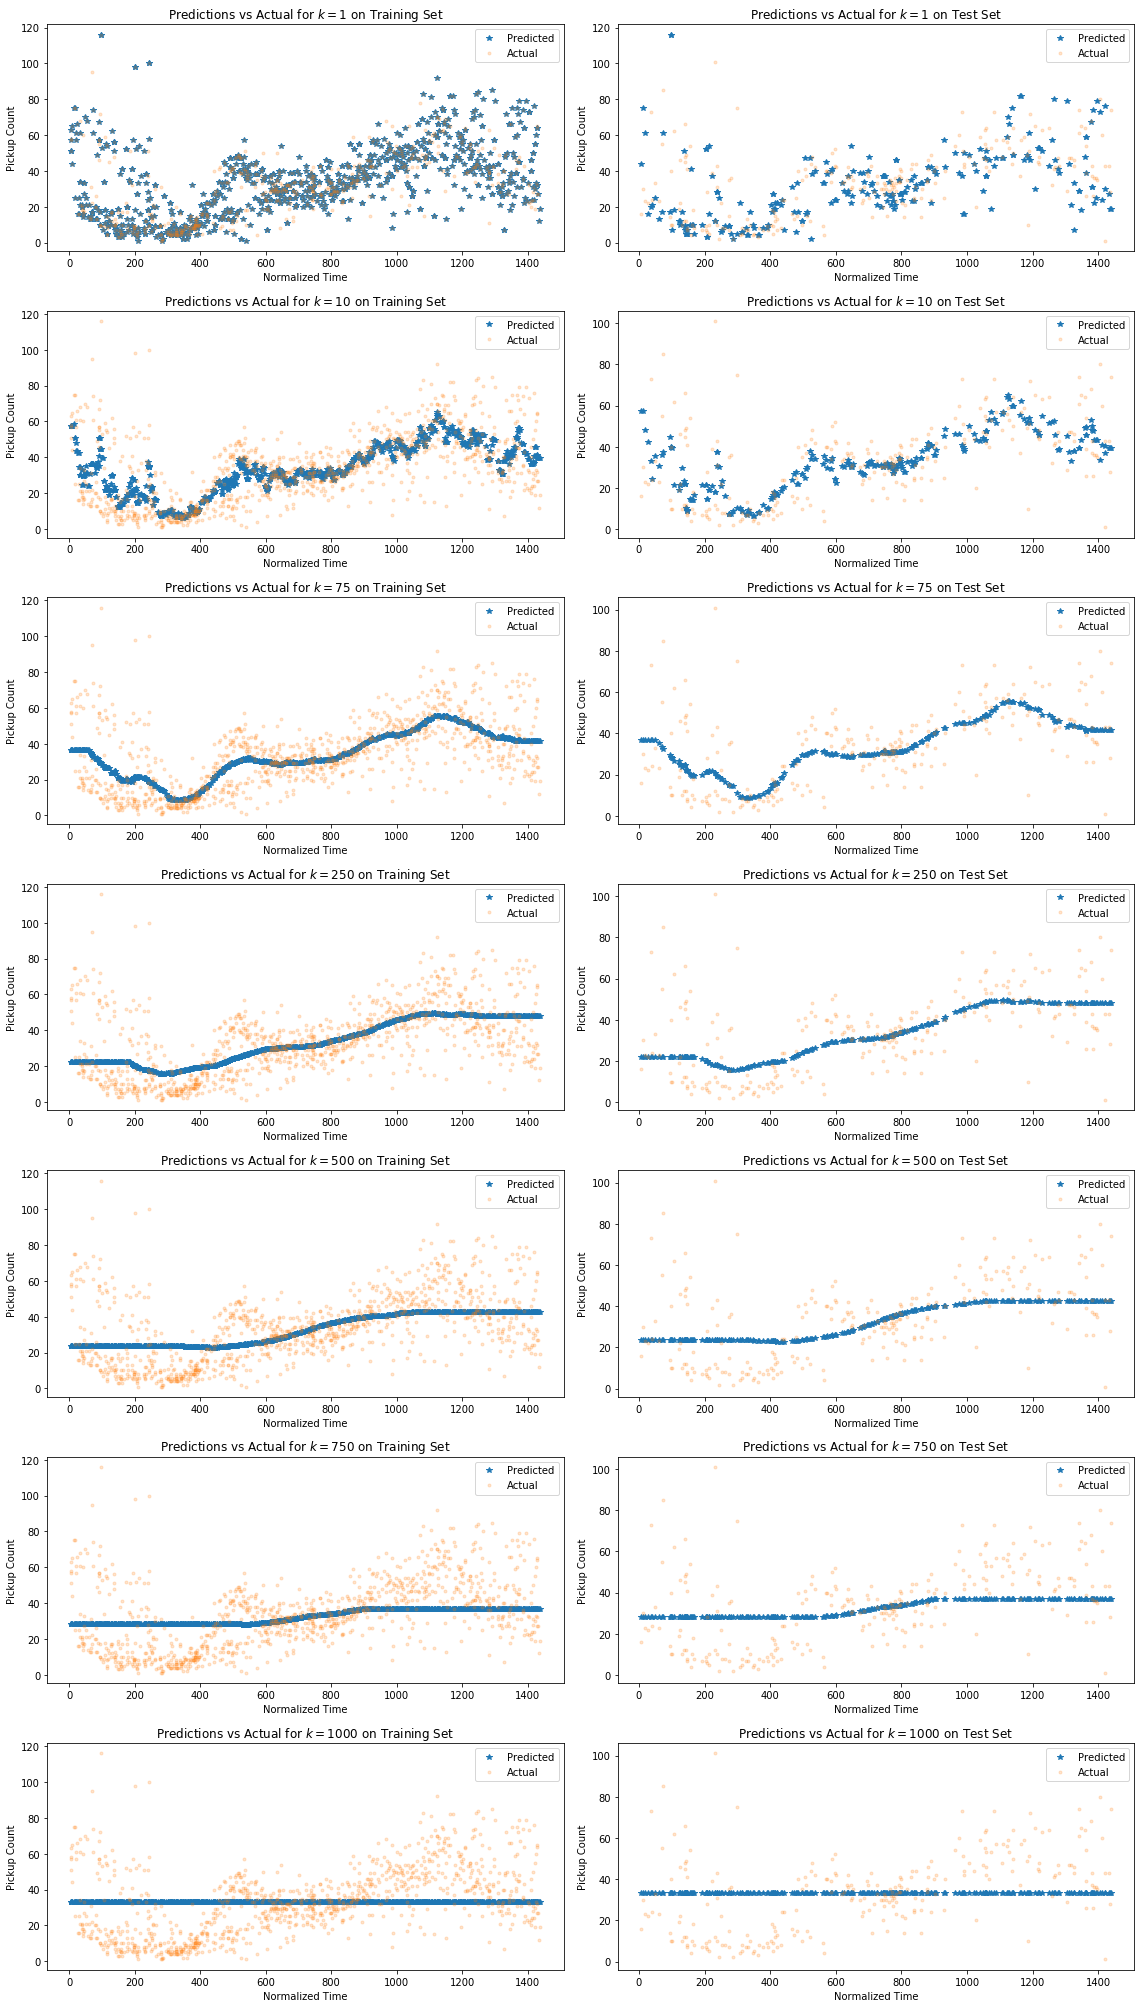

In [10]:
# Plot predictions vs actual

# Notice that nrows is set to the variable size. This makes the code more readable and adaptable
fig, axes = plt.subplots(nrows=len(k_values), ncols=2, figsize=(16,28))

for i, k in enumerate(k_values):
    plot_knn_prediction(axes[i][0], train_data, knn_predicted_pickups_train[k], k, "Training")
    plot_knn_prediction(axes[i][1], test_data, knn_predicted_pickups_test[k], k, "Test")
    
fig.tight_layout()

**2.3**

In [11]:
## Code here

knn_r2_train = {k : r2_score(train_data[['PickupCount']], knn_predicted_pickups_train[k]) for k in k_values}
knn_r2_test = { k : r2_score(test_data[['PickupCount']], knn_predicted_pickups_test[k]) for k in k_values}

# This format makes the display much more readable
knn_r2_df = pd.DataFrame(data = {"k" : tuple(knn_r2_train.keys()), 
                                    "Train R^2" : tuple(knn_r2_train.values()), 
                                    "Test R^2" : tuple(knn_r2_test.values())})


knn_r2_df

,Test R^2,Train R^2,k
0,-0.418932,0.712336,1
1,0.272068,0.509825,10
2,0.390310,0.445392,75
3,0.340341,0.355314,250
4,0.270321,0.290327,500
5,0.164909,0.179434,750
6,-0.000384,0.000000,1000


**2.4**

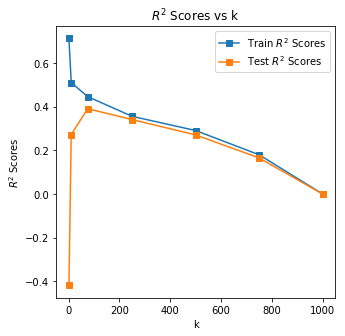

In [12]:
## Code for your plot here

fig, axes = plt.subplots(figsize = (5,5))
axes.plot(knn_r2_df['k'], knn_r2_df['Train R^2'], 's-', label='Train $R^2$ Scores')
axes.plot(knn_r2_df['k'], knn_r2_df['Test R^2'], 's-', label='Test $R^2$ Scores')
axes.set_xlabel('k')
axes.set_ylabel('$R^2$ Scores')
# A generic title of this format (y vs x) is generally appropriate
axes.set_title("$R^2$ Scores vs k")
# Including a legend is very important
axes.legend();

**2.5**

**Discuss the results**


1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
   
    A k-NN regression model that used $k = n$ is the equivalent of using the mean of the response variable values for all the points of the dataset as a prediction model.

2. What does an $R^2$ score of $0$ mean?

    An $R^2$ value of 0 indicates a model making predictions equivalent to a model using a constant prediction of the data's mean (and as such explains none of the variation around the mean). In k-NN Regression, an example would be the model with $k = n$ or in this case $k = 1000$
  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?

    None of the calculated $R^2$ values in this case on the training set are negative.  We see negative $R^2$ values for $k = 1$ and $k = 1000$ on the test set (although the test set $R^2$ value for $k = 1000$ is very close to 0).  A negative $R^2$ value indicate a model making predictions less accurate than using a constant prediction (for any configuration of features) of the mean of all response variable values.  Our observations of a highly negative $R^2$ score for $k = 1$ on the test set means that predictive value of the 1-NN model is very poor and 1-NN would be a worse model for our data than just taking the average value.  For $k = 1000$ the difference between the observed $R^2$ score on the test set and 0 is due to stochasticity and 1000-NN has a predictive power essentially equivalent to taking the average value on the training set as a prediction (in this particular case it so happens that 1000-NN is exactly the same model as using the average value of the training set for a prediction). 
    
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.

    The training and test plots of $R^2$ exhibit different trends, as for small $k$, the model overfits the data, so it achieves a very good $R^2$ on the training set and a very poor $R^2$ on the test data. At large K values the model underfits. Although it performs equally well on the train and test data, it's not doing as well on either one as it did at a different value of $k$.
  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?

    The lower the value of $k$, the more variance in the predictions. The higher the value of $k$, the smoother the prediction. On the test set, greater $k$ decreases overfitting, but too large of $k$ does not allow for enough variation for an accurate prediction, so the test $R^2$ increases to a point and then decreases. Because the training $R^2$ benefits from the overfitting, the training $R^2$ only decreases as $k$ increases.  From an inspection of the plot, an ideal value of $k$ looks to be around 75.
  
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

    Based on test set $R^2$ scores, the best value of $k$ is 75 with a training set $R^2$ score of 0.445 and a test set score of 0.390. Note that *best* refers to performance on the test set, the set on which the model can be evaluated.

<div class="exercise"> <b> Question 3 [20 pts] </b></div>

We next consider simple linear regression, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter (shorter) or looser (longer) than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.

### Answers

**3.1**

In [13]:
## Code here

# Look at these variables on their own - they format for both constant term and linear predictor
train_data_augmented = sm.add_constant(train_data['TimeMin'].values)
test_data_augmented = sm.add_constant(test_data['TimeMin'].values)
OLSModel = OLS(train_data['PickupCount'].values, train_data_augmented).fit()


**3.2**

In [14]:
# OLS Linear Regression model training predictions
ols_predicted_pickups_train = OLSModel.predict(train_data_augmented)

# OLS Linear Regression model test predictions
ols_predicted_pickups_test = OLSModel.predict(test_data_augmented)

In [15]:
# Function to plot predicted vs actual for a given k and dataset
def plot_ols_prediction(ax, dataset, predictions, dataset_name= "Training"):
    
    # scatter plot predictions
    ax.plot(dataset['TimeMin'], predictions, '*',  label='Predicted')
    
    # scatter plot actual
    ax.plot(dataset['TimeMin'], dataset['PickupCount'], '.', alpha=0.2, label='Actual')
    
    
    # Set labels
    ax.set_title("Predictions vs Actual on {} Set".format(dataset_name))
    ax.set_xlabel('Normalized Time')
    ax.set_ylabel('Pickup Count')
    ax.legend()

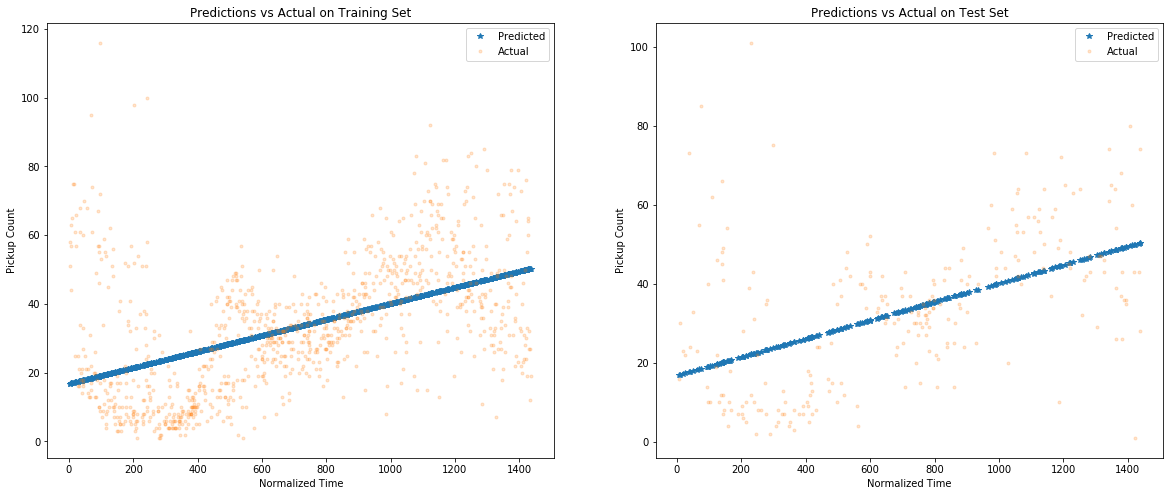

In [16]:
## Code for your plot here

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

plot_ols_prediction(axes[0], train_data, ols_predicted_pickups_train, "Training")
plot_ols_prediction(axes[1], test_data, ols_predicted_pickups_test, "Test")
    


**3.3**

In [17]:
## Code here

r2_score_train = r2_score(train_data[['PickupCount']].values, ols_predicted_pickups_train) 
r2_score_test = r2_score(test_data[['PickupCount']].values, ols_predicted_pickups_test)

print("R^2 score for training set: {:.4}".format(r2_score_train))
print("R^2 score for test set: {:.4}".format(r2_score_test))


R^2 score for training set: 0.243
R^2 score for test set: 0.2407


**3.4**

In [18]:
## show summary
OLSModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     320.4
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           2.34e-62
Time:                        17:16:42   Log-Likelihood:                -4232.9
No. Observations:                1000   AIC:                             8470.
Df Residuals:                     998   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7506      1.058     15.838      0.000      14.675      18.826
x1             0.0233      0.001     17.900      0.000       0.021       0.026
==============================================================================
Omnibus:                      203.688   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.910
Skew:                           1.111   Prob(JB):                    3.02e-101
Kurtosis:                       5.485   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
## Code here
ols_intercept = OLSModel.params[0]
ols_slope = OLSModel.params[1]


print("Intecept:  {:.3}".format(ols_intercept))
print("Slope: {:.3}".format(ols_slope))

Intecept:  16.8
Slope: 0.0233


**3.5**

In [20]:
## Code here

## Code here
conf_int = OLSModel.conf_int()

# Doing it by hand would be something like 16.7506 +/- (1.96 * 1.058), and same process for slope

print("95% confidence interval for intercept: [{:.4}, {:.4}]".format(conf_int[0][0],conf_int[0][1]))
print("95% confidence interval for intercept: [{:.4}, {:.4}]".format(conf_int[1][0],conf_int[1][1]))



95% confidence interval for intercept: [14.68, 18.83]
95% confidence interval for intercept: [0.02078, 0.02589]


**3.6**

In [21]:
sorted_train_data = train_data.sort_values(['TimeMin'])
sorted_train_data_augmented = sm.add_constant(sorted_train_data['TimeMin'].values)

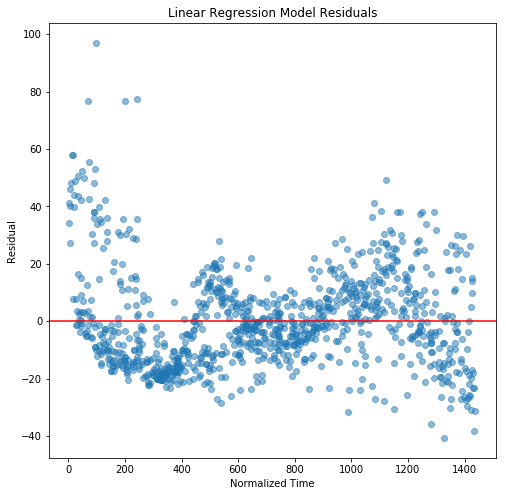

In [22]:
## Code here

# calculate residuals
# we want sorted values
residuals = sorted_train_data['PickupCount'].values - OLSModel.predict(sorted_train_data_augmented)


fig, ax = plt.subplots(figsize=(8, 8))

# Plotting residual as a function of the predictor lets you determine where within the predictor
# values the model is consistently overestimating / underestimating to evaluate the model
ax.scatter(sorted_train_data['TimeMin'], 
               residuals, alpha=0.5)
ax.axhline(y=0, color='red') 

ax.set_title('Linear Regression Model Residuals')
ax.set_xlabel('Normalized Time')
ax.set_ylabel('Residual');



**3.7**

**Discuss the results**

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
  
  The test $R^2$ is lower for Linear Regression than for k-NN regression for all but the most suboptimal values of $k$ ($k \approx 0$ or $k \approx n$).  This isn't surprising since there are various indicators that a linear regression model isn't an ideal model for this particular choice of data and feature space.
  
2. What does the sign of the slope of the fitted linear model convey about the data?
  
  The positive slope implies that the number of pickups increases throughout the day. The slops is positive for all values within the confidence interval.
  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?
  
  The estimates for slope and intercept are reasonably precise. The intercept is estimated to fall between around 14 to 18 on data that ranges from 0-100, which reasonably small though certainly far from perfect. The slope, it seems, is very precise, estiamted to be between .020 and .025. In practical terms, using the lower end would predict 29 pickups (plus the intercept) at 11:59pm and using the upper bounds would predict 36 pickups (plus the intercept) at 11:59 pm, which is a farily tight range. Our uncertainty in the value of the slope is small enough to only moderately impact our overall uncertainty, even at the extremes of the data.
  
4. Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter (shorter) or looser (longer) than the $95\%$ confidence intervals? Briefly explain your answer.
  
  We'd expect a 99% confidence interval to be looser, as it should allow for an at least even wider possibility of values that are believable, or consistent with the data. With increased confidence level, even more values become plausible so the interval is lengthened on both sides.
  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.
  
  The assumption of linearity does not seem to be perfectly justified, as the residuals are not scattered randomly around 0 and there is a clear structure!
  

<div class="exercise">  <b> Question 4 [20 pts]: Roll Up Your Sleeves Show Some Class </b> </div>

We've seen Simple Linear Regression in action and we hope that you're convinced it works.  In lecture we've thought about the mathematical basis for Simple Linear Regression.  There's no reason that we can't take advantage of our knowledge to create our own implementation of Simple Linear Regression.  We'll provide a bit of a boost by giving you some basic infrastructure to use.  In the last problem, you should have heavily taken advantage of the `statsmodels` module.  In this problem we're going to build our own machinery for creating Linear Regression models and in doing so we'll follow the `statsmodels` API pretty closely.  Because we're following the `statmodels` API, we'll need to use python classes to create our implementation.  If you're not familiar with python classes don't be alarmed.  Just implement the requested functions/methods in the CS109OLS class that we've given you below and everything should just work.  If you have any questions, ask the teaching staff.

**4.1**. Implement the `fit` and `predict` methods in the CS109OLS class we've given you below as well as the `CS109r2score` function that we've provided outside the class.

**Hints**:

1. `fit` should take the provided numpy arrays `endog` and `exog` and use the normal equations to calculate the optimal linear regression coefficients.  Store those coefficients in self.params
2. In `fit` you'll need to calculate an inverse.  Use np.linalg.pinv
3. `predict` should use the numpy array stored in `self.params` and calculate an np.array of predicted values.
4. `CS109r2score` should take the true values of the response variable `y_true` and the predicted values of the response variable `y_pred` and calculate and return the $R^2$ score. 
5.  To replicate the statsmodel API your code should be able to be called as follows:
    ```python
    mymodel = CS109OLS(y_data, augmented_x_data)
    mymodel.fit()
    predictions = mymodel.predict()
    R2score = CS109r2score(true_values, predictions)
    ```

**4.2**. As in 3.1 create a `CS109OLS` class instance and  fit a Linear Regression model on the training set (`train_data`).  Store your model in the variable `CS109OLSModel`.  Remember that as with sm.OLS your class should assume feature data augmented by a constant 1 vector.

**4.3**  As in 3.2 Overlay a scatter plot of the actual values of `TimeMin` vs. `PickupCount` on the training set with a scatter plot of `TimeMin` vs. predictions of `PickupCount` from your `CS109OLSModel` Linear Regression model on the training set.  Do the same for the test set.  You should have one figure with two subplots, one subplot for the training set and one for the test set.  How does your figure compare to that in 3.2?

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)

**4.4**. As in 3.3, report the $R^2$ score for the fitted model on both the training and test sets using your `CS109OLSModel`.  Make sure to use the `CS109r2score` that you created.  How do the results compare to the scores in 3.3?

**4.5**. as in 3.4, report the slope and intercept values for the fitted linear model your `CS109OLSModel`.   How do the results compare to the the values in 3.4?


### Answers

**4.1**

In [23]:
class CS109OLS(object):
    
    def __init__(self, endog = [], exog = []):
        self.params = []
        self.endog = np.array(endog)
        self.exog = np.array(exog)
        
            
  
                    
    def fit(self):
        
        ## Your Code Here
        
        # We assume we'll calculate beta coefficients
        no_betas = False
        
        # For data use endog/exog attributes
        X_data = self.exog
        Y_data = self.endog
            
        # if X_data is still empty then no beta coefficients
        if (not np.array(X_data).size):
            no_betas = True
        
        # Y_data should not be empty otherwise no beta coefficients
        if (not np.array(Y_data).size):
            no_betas = True
            
        # Finally Y_data should be the same length as X or no betas
        if (Y_data.shape[0] != X_data.shape[0]):
            no_betas = True
            
        # if we don't right data so set coefficients to empty
        if no_betas:
            self.params = []
            self.rsquares = None
        else:
        # we have data, so let's construct the coefficients    
        
            # construct the Gram matrix (X_transpose * X)
            gram = X_data.T@X_data

            # generate our beta coefficient matrix by using pseudo inverse
            # (in case data isn't linearly independent)
            beta_coefs = np.linalg.pinv(gram)@X_data.T@Y_data

            self.params = beta_coefs
        
        return(self)
            
    def predict(self, exog=None):
        
        # Your Code Here
        if type(exog) == type(None):
            exog = self.exog
            
        if not np.array(self.params).size:
            raise(Exception("fit() has not been called on OLS Model!"))
    
        
        y_hat = exog@self.params
                  
        return y_hat
            
        
        
def CS109r2score(y_true, y_pred):
    
    # Make sure both methods are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # check shapes
    if len(y_true.shape) == 1:
        y_true = np.array([y_true]).T
    
    if len(y_pred.shape) == 1:
        y_pred = np.array([y_pred]).T
        
    # calculate mean of y
    y_mean = y_true.mean()

    # Calculate residuals
    SSE = np.sum((y_true - y_pred)**2)
    SST = np.sum((y_true - y_mean)**2)
        
    Rsquared = 1 - float(SSE/SST)
        
    return Rsquared
    
    


**4.2**

In [24]:
## Code here
OLSModel_cmp = OLS(train_data['PickupCount'].values, train_data_augmented).fit()
CS109OLSModel = CS109OLS(train_data['PickupCount'].values, train_data_augmented).fit()

**4.3**

In [25]:
# OLS Linear Regression model training predictions
cs109_predicted_pickups_train = CS109OLSModel.predict(train_data_augmented)

# OLS Linear Regression model test predictions
cs109_predicted_pickups_test = CS109OLSModel.predict(test_data_augmented)

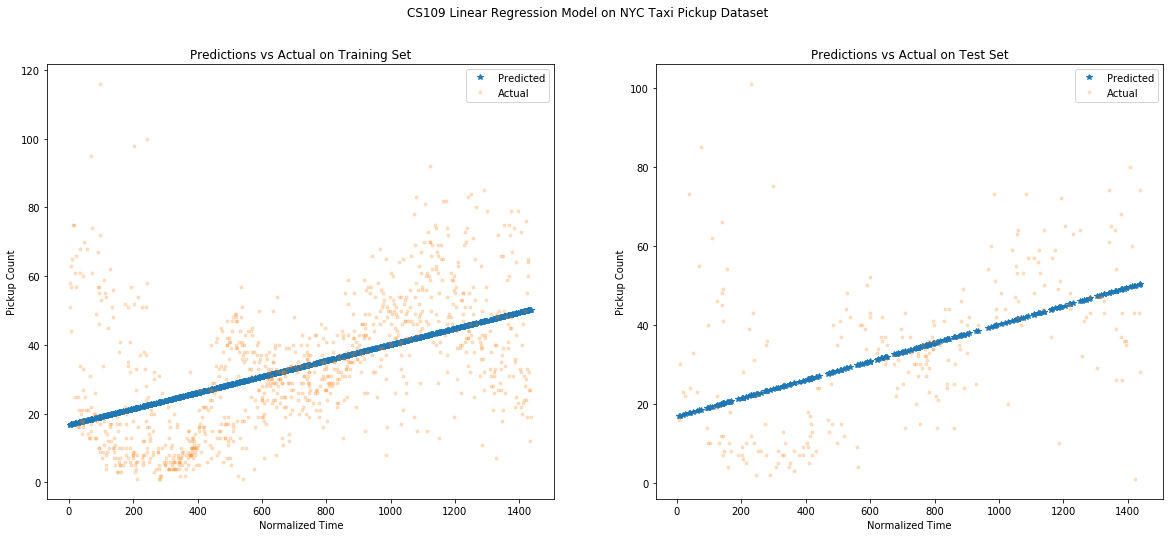

In [26]:
## Code for your plot here

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

plot_ols_prediction(axes[0], train_data, cs109_predicted_pickups_train, "Training")
plot_ols_prediction(axes[1], test_data, cs109_predicted_pickups_test, "Test")

fig.suptitle("CS109 Linear Regression Model on NYC Taxi Pickup Dataset");
    


**4.4**

In [27]:
## Code here

cs109_r2_score_train = CS109r2score(train_data[['PickupCount']].values, cs109_predicted_pickups_train) 
cs109_r2_score_test = CS109r2score(test_data[['PickupCount']].values, cs109_predicted_pickups_test)

print("R^2 score for training set: {:.4}".format(cs109_r2_score_train))
print("R^2 score for test set: {:.4}".format(cs109_r2_score_test))


R^2 score for training set: 0.243
R^2 score for test set: 0.2407


The results are the same as in **3.3**

**4.5**

In [28]:
## Code here
ols_intercept = CS109OLSModel.params[0]
ols_slope = CS109OLSModel.params[1]


print("Intecept:  {:.3}".format(ols_intercept))
print("Slope: {:.3}".format(ols_slope))


Intecept:  16.8
Slope: 0.0233


The results are the same as in **3.4**

<div class="exercise"><b> Question 5 [20 pts] </b></div>

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.


**5.1**. We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**5.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**5.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?

**5.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the 3 outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.

**5.5** Create a figure with two subplots.  In one subplot include a visualization of the Linear Regression line from the full training set overlayed on the test set data in `outliers_test`.  In the other subplot include a visualization of the Linear Regression line from the training set data with outliers removed overlayed on the test set data in `outliers_test`.  Visually which model fits the test set data more closely?

**5.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**5.7**. One potential problem with the brute force outlier detection approach in 5.3 and the heuristic algorithm you constructed 5.4 is that they assume prior knowledge of the number of outliers.  In general you can't expect to know ahead of time the number of outliers in your dataset.  Alter the algorithm you constructed in 5.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order that your algorithm found them).  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
    1. How many outliers should you try to identify in each step?
    2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
    
**5.8**. Run your algorithm in 5.7 on the training set data.  

    1. What outliers does it identify?
    2. How do those outliers compare to the outliers you found in 5.4?
    3. How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?

### Answers

In [29]:
## Code here
outliers_train = pd.read_csv("outliers_train.csv")
outliers_test = pd.read_csv("outliers_test.csv")

outliers_train.describe()

,X,Y
count,53.000000,53.000000
mean,-0.060179,-12.356066
std,1.022698,166.899480
min,-2.110000,-334.859357
25%,-0.813775,-134.582390
50%,0.011852,14.303940
75%,0.630360,105.731108
max,1.931000,320.000000


In [30]:
outliers_train.head()

,X,Y
0,-0.773019,-219.103753
1,-0.394034,-334.859357
2,0.630360,-16.232549
3,-0.350418,-179.034618
4,-1.491328,-109.710316


In [31]:
outliers_test.describe()

,X,Y
count,50.000000,50.000000
mean,-0.108523,-17.277379
std,0.969121,138.439208
min,-2.368623,-391.123602
25%,-0.619012,-100.876386
50%,-0.171438,-17.835148
75%,0.447461,72.207069
max,1.850152,294.925241


In [32]:
outliers_test.head()

,X,Y
0,-0.573524,-91.080764
1,-0.793911,-19.982576
2,0.788391,118.593685
3,0.489036,64.973804
4,1.530648,178.281580


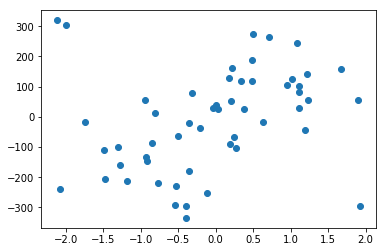

In [33]:
plt.scatter(outliers_train["X"],outliers_train["Y"])

**5.1**

**What does a visual inspection of training set tell you about the existence of outliers in the data?**
  
The dataset seems to have a roughly linear trend with 3 really clear outliers. 


**5.2**

In [34]:
## Code here
# Reshape with -1 makes numpy figure out the correct number of rows
outliers_orig_train_X = outliers_train["X"].values.reshape(-1,1)
outliers_orig_train_Y = outliers_train["Y"].values.reshape(-1,1)

outliers_train_X = sm.add_constant(outliers_orig_train_X)
outliers_train_Y = outliers_orig_train_Y

outliers_orig_test_X = outliers_test["X"].values.reshape(-1,1)
outliers_orig_test_Y = outliers_test["Y"].values.reshape(-1,1)

outliers_test_X = sm.add_constant(outliers_orig_test_X)
outliers_test_Y = outliers_orig_test_Y

OutlierOLSModel = sm.OLS(outliers_train_Y, outliers_train_X).fit() 

OutlierOLSModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.689
Date:                Thu, 05 Jul 2018   Prob (F-statistic):             0.0351
Time:                        17:16:44   Log-Likelihood:                -343.59
No. Observations:                  53   AIC:                             691.2
Df Residuals:                      51   BIC:                             695.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5063     22.192     -0.428      0.670     -54.059      35.046
x1            47.3554     21.869      2.165      0.035       3.452      91.259
==============================================================================
Omnibus:                        2.102   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                1.251
Skew:                           0.215   Prob(JB):                        0.535
Kurtosis:                       3.617   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**5.3**

**One potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?**
  
There are 53 total samples in the training set.  That means there are $\binom{53}{3}$ or 23426 subsets in the training set with 3 points removed.  We'll need to compute a Linear Regression model on each one and find the best one (presumably the one with the highest $R^2$ value).


**5.4**

In [35]:
## Code here

def find_outliers_simple(dataset_x, dataset_y):
    
    # calculate absolute value residuals
    y_pred = sm.OLS(dataset_y, dataset_x).fit().predict().reshape(-1,1)
    residuals = np.abs(dataset_y - y_pred)

    # use argsort to order the indices by absolute value of residuals
    # get all but the 3 highest residuals
    outlier_indices = np.argsort(residuals, axis=0).flatten()[-3:]
    
    return list(outlier_indices)

In [36]:
simple_outlier_indices = find_outliers_simple(outliers_train_X, outliers_orig_train_Y)

# get outliers
simple_outliers_x = outliers_orig_train_X[simple_outlier_indices]
simple_outliers_y= outliers_orig_train_Y[simple_outlier_indices]

In [37]:
# new_dataset_indices are the complements of our outlier indices in the original set
new_dataset_indices = list(set(range(len(outliers_orig_train_X))) - set(simple_outlier_indices))
new_dataset_indices.sort()

# get outliers free dataset
simple_outliers_free_x = outliers_train_X[new_dataset_indices]
simple_outliers_free_y = outliers_train_Y[new_dataset_indices]

In [38]:
print("Outlier X values: {} ".format(simple_outliers_x))
print("Outlier Y values: {} ".format(simple_outliers_y))

Outlier X values: [[ 1.931]
 [-1.991]
 [-2.11 ]] 
Outlier Y values: [[-297.]
 [ 303.]
 [ 320.]] 


In [39]:
# calculate outlier model
OutlierFreeSimpleModel = sm.OLS(simple_outliers_free_y, simple_outliers_free_x).fit()

OutlierFreeSimpleModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     32.50
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           7.16e-07
Time:                        17:16:44   Log-Likelihood:                -309.21
No. Observations:                  50   AIC:                             622.4
Df Residuals:                      48   BIC:                             626.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.4796     16.944     -1.032      0.307     -51.547      16.588
x1           104.8467     18.392      5.701      0.000      67.867     141.827
==============================================================================
Omnibus:                        0.600   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.673
Skew:                          -0.238   Prob(JB):                        0.714
Kurtosis:                       2.689   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**5.5**

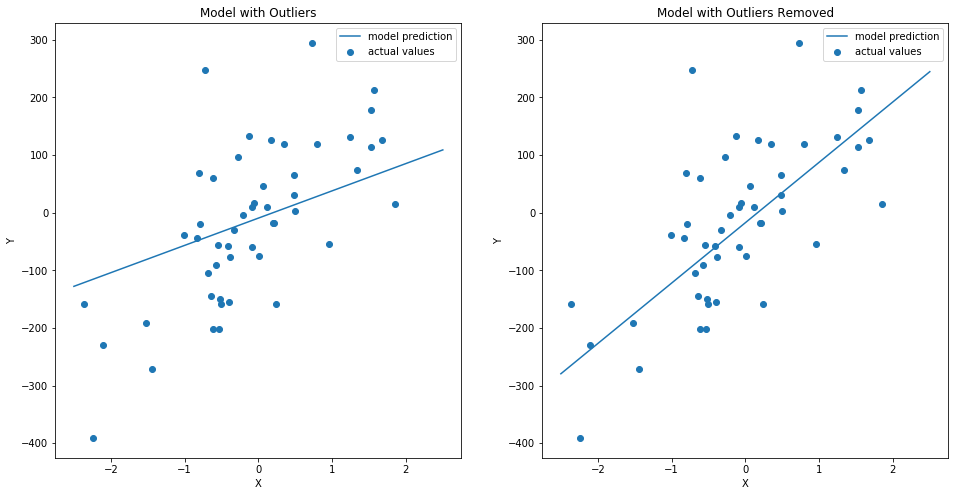

In [40]:
## Code for your plot here

fig, axs = plt.subplots(1,2, figsize=(16,8))

def visualize_outlier_plot(axis, model, title):

    ticks = np.linspace(-2.5,2.5, 100)
    regression_line = ticks*model.params[1] + model.params[0]
    axis.scatter(outliers_test["X"],outliers_test["Y"], label="actual values")
    axis.plot(ticks, regression_line, label="model prediction")
    axis.set_title(title)
    axis.set_xlabel("X")
    axis.set_ylabel("Y")
    axis.legend()
    
    
visualize_outlier_plot(axs[0], OutlierOLSModel, "Model with Outliers")
visualize_outlier_plot(axs[1], OutlierFreeSimpleModel, "Model with Outliers Removed")


The model with outliers removed fits the test data more closely.

**5.6**

In [41]:
## Code here

r2_with_outliers = r2_score(outliers_test_Y, OutlierOLSModel.predict(sm.add_constant(outliers_test_X)))
r2_wo_outliers = r2_score(outliers_test_Y, OutlierFreeSimpleModel.predict(sm.add_constant(outliers_test_X)))

print("R^2 score with outliers: {:.4}".format(r2_with_outliers))
print("R^2 score with outliers removed: {:.4}".format(r2_wo_outliers))

R^2 score with outliers: 0.3409
R^2 score with outliers removed: 0.453


**5.7**

In [42]:
## Code here

def get_individual_outlier(dataset_x, dataset_y):
    
    original_model = sm.OLS(dataset_y, dataset_x).fit()
    best_rsquared = original_model.rsquared
    best_i = -1
    
    for i in range(len(dataset_x)):
        new_dataset_x = np.delete(dataset_x, i, axis=0)
        new_dataset_y = np.delete(dataset_y, i, axis=0)
                   
        model_i = sm.OLS(new_dataset_y, new_dataset_x).fit()
                   
        current_rsquared =  model_i.rsquared
        if (current_rsquared > best_rsquared): 
            best_rsquared = current_rsquared
            best_i = i
                   
    return best_i, best_rsquared

def find_outliers_general(dataset_x, dataset_y, tolerance=0.03, max_outlier_count=None):
    
    rsquareds = [sm.OLS(dataset_y, dataset_x).fit().rsquared]
    removed = 0
    original_indices = list(range(len(dataset_x)))
    outlier_indices = [-1]
    
    if max_outlier_count == None and len(dataset_x) > 0:
        max_outlier_count = np.sqrt(len(dataset_x))
    else:
        return ([], dataset_x,dataset_y )
    
    while (len(dataset_x) > 1):
        outlier_index, rsquared = get_individual_outlier(dataset_x, dataset_y)
        
        if removed > max_outlier_count:
            break
            
        rsdiff = rsquared - rsquareds[-1]
        
        if (rsdiff > 0) and np.abs(rsdiff) > tolerance:
            rsquareds.append(rsquared)
            outlier_indices.append(original_indices.pop(outlier_index))
            dataset_x = np.delete(dataset_x, outlier_index, axis=0)
            dataset_y = np.delete(dataset_y, outlier_index, axis=0)
            removed += 1
        else:
            break
    
    return (outlier_indices[1:])


    

**5.8**

In [43]:
## Code here

general_outlier_indices = find_outliers_general(outliers_train_X,outliers_train_Y)

In [44]:
general_outlier_indices

[50, 51, 52, 6]

In [45]:
print("Outlier X values: {} ".format(outliers_orig_train_X[general_outlier_indices]))
print("Outlier Y values: {} ".format(outliers_orig_train_Y[general_outlier_indices]))

Outlier X values: [[-2.11      ]
 [-1.991     ]
 [ 1.931     ]
 [-1.74254703]] 
Outlier Y values: [[ 320.        ]
 [ 303.        ]
 [-297.        ]
 [ -15.97645486]] 


In [46]:
# new_dataset_indices are the complements of our outlier indices in the original set
new_dataset_indices = list(set(range(len(outliers_orig_train_X))) - set(general_outlier_indices))
new_dataset_indices.sort()

# get outliers free dataset
general_outliers_free_x = outliers_train_X[new_dataset_indices]
general_outliers_free_y = outliers_train_Y[new_dataset_indices]

In [47]:
# calculate outlier model
OutlierFreeGeneralModel = sm.OLS(general_outliers_free_y, general_outliers_free_x).fit()

OutlierFreeGeneralModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     36.33
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           2.45e-07
Time:                        17:16:44   Log-Likelihood:                -302.16
No. Observations:                  49   AIC:                             608.3
Df Residuals:                      47   BIC:                             612.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.3602     16.820     -1.270      0.210     -55.198      12.478
x1           113.0651     18.758      6.027      0.000      75.328     150.802
==============================================================================
Omnibus:                        0.619   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.693
Skew:                          -0.243   Prob(JB):                        0.707
Kurtosis:                       2.678   Cond. No.                         1.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
## Code here

r2_simple = r2_score(outliers_test_Y, OutlierFreeSimpleModel.predict(sm.add_constant(outliers_test_X)))
r2_general = r2_score(outliers_test_Y, OutlierFreeGeneralModel.predict(sm.add_constant(outliers_test_X)))

print("R^2 score Simple Outlier Algorithm: {:.4}".format(r2_simple))
print("R^2 score General Outlier Algorithm: {:.4}".format(r2_general))

R^2 score Simple Outlier Algorithm: 0.453
R^2 score General Outlier Algorithm: 0.4364


**1. What outliers does it identify?**
    
    See above: 
    Outlier X values: 
    [[-2.11      ]
    [-1.991     ]
    [ 1.931     ]
    [-1.74254703]] 
    Outlier Y values: 
    [[ 320.        ]
    [ 303.        ]
    [-297.        ]
    [ -15.97645486]] 
**2. How do those outliers compare to the outliers you found in 5.4?**
    
    They're a superset of the outliers found in 5.4 with the simple algorithm.

**3. How does the general outlier free Linear Regression model perform compared to the simple one in 5.4?**

    Pretty comparable.  The general algorithm does better on the training set, but worse on the test set if you look at $R^2$ values.

---- 


In [49]:
from IPython.core.display import HTML
def css_styling(): styles = open("cs109.css", "r").read(); return HTML(styles)
css_styling()